Welcome to your DataCamp Project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your Project.

The first step is forking the repository in which this notebook lives. After that, there are three parts to be completed in this notebook:

- **Project information**:  The title of the Project, a Project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your Project.

- **Rough draft of code for rest of Project:** a rough draft of the remaining code for the rest of your Project (no accompanying text cells required).

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp Project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Do expensive wines taste better?

**Name:** Daniel Van Hasselt

**Email address associated with your DataCamp account:** danielvanhasselt@hotmail.com

**Project description**: This will be read by the students on the DataCamp platform **before** deciding to start the Project. The description should be three paragraphs, written in Markdown.

- Paragraph 1 should be an exciting introduction to analysis/model/etc. students will complete.
- Paragraph 2 should list the background knowledge you assume the student doing this Project will have, the more specific the better. Please list things like modules, tools, functions, methods, statistical concepts, etc.
- Paragraph 3 should describe and link to (if possible) the dataset used in the Project.

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp Project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp Project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a Project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your Project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your Project.

As you are completing each task, you may wish to consult the Project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Title of the first task  (<= 55 chars) (sentence case)

An exciting intro to the analysis. Provide context on the problem you're going to solve, the dataset(s) you're going to use, the relevant industry, etc. You may wish to briefly introduce the techniques you're going to use. Tell a story to get students excited! It should at most have 1200 characters.

The most common error instructors make in **context cells** is referring to the student or the Project. We want Project notebooks to appear as a blog post or a data analysis. Bad: *"In this Project, you will..."* Good: *"In this notebook, we will..."*

The first task in Projects often involve loading data. Please store any data files you use in the `datasets/` folder in this repository.

Images are welcome additions to every Markdown cell, but especially this first one. Make sure the images you use have a [permissive license](https://support.google.com/websearch/answer/29508?hl=en) and display them using [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images). Store your images in the `img/` folder in this repository.

In [304]:
# Import Scrapy
import scrapy

# Create Spider object
class WineMag(scrapy.Spider):
    
    # Name Spider
    name = 'winemag'
    
    def start_requests(self):
        pass
    
    def parse_overview(self, response):
        pass
    
    def parse_detail(self, response):
        pass


## 2. Title of the second task (<= 55 chars)  (sentence case)

Context / background / story / etc. This cell should at most have 800 characters.

The most common error instructors make in **context cells** is referring to the student or the Project. We want Project notebooks to appear as a blog post or a data analysis. Bad: *"In this task, you will..."* Good: *"Next, we will..."*

In [312]:
# Define start_requests method
def start_requests(self):
    
    # URL
    base_url = "https://www.winemag.com/?s=&drink_type=wine&pub_date_web={}&page="
    
    # list of URLs by year : 2015 - 2019
    urls = [base_url.format(str(2019-i)) for i in range(5)]
    
    # Loop over URLs
    for url in urls:
        # Scrape first 10 pages per year
        for i in range(1,11):
            # Yield URL in Scrapy Request method
            yield scrapy.Request( url = url + str(i), callback = self.parse_overview)

            
# Define parse_overview method (next step)
def parse_overview(self, response):
    pass
    


## 3. Title of the third task (<= 55 chars)  (sentence case)

Context / background / story / etc. This cell should at most have 800 characters.

The most common error instructors make in **context cells** is referring to the student or the Project. We want Project notebooks to appear as a blog post or a data analysis. Bad: *"In this task, you will..."* Good: *"Next, we will..."*

In [313]:
# Define parse_overview method
def parse_overview(self, response):

    # Get all wines from overview page
    wines = response.xpath('//li[contains(@class,"review-item")]')
    
    # Extract name of wine
    name = wines.xpath('.//div[contains(@class,"title")]/text()').extract()
    
    # Extract rating
    ratings = wines.xpath('.//div[contains(@class,"info")]/span[contains(@class,"rating")]//text()').extract()
    
    # Remove string 'Points' so list only contains rating values
    rating = [r for r in ratings if 'POINTS' not in r.upper()]
    
    # Extract price
    price = wines.xpath('.//span[contains(@class,"price")]/text()').extract()
    
    # Extract link to details page
    links = wines.xpath('./a[contains(@class,"review-listing")]/@href').extract()
    
    # Follow URL for details
    for link in links:
        yield response.follow(url = link, callback = self.parse_detail)

        

## 4. Title of the third task (<= 55 chars)  (sentence case)

Please include a rough draft of the code for the rest of your proposed Project below. Use as many code cells as you'd like. No accompanying text (i.e. context) cells required.

In [ ]:
# Define parse_overview method
def parse_detail(self, response):
    
    # Get URL of response object
    url = response.url
    
    # Extract detail info
    details = response.xpath('//ul[@class="secondary-info"]')
    
    # Extract labels and values
    labels = details.xpath('.//div[@class="info-label small-7 columns"]//text()')
    values = details.xpath('.//div[@class="info small-9 columns"]//text()')
    
    # Zip labels and values
    data = dict(zip([l.extract().strip() for l in labels],[v.extract().strip() for v in values]))

    
    alcohol, category, date = None, None, None

    if "Alcohol" in data.keys(): alcohol = data["Alcohol"]
    if "Category" in data.keys(): category = data["Category"]
    if "Date Published" in data.keys(): date = data["Date Published"]

   
    ### Data into files/dictionary?
    
    

# 

# 

In [284]:
# load data
import pandas as pd

df = pd.read_csv('datasets/winemag.csv')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55070 entries, 0 to 55069
Data columns (total 8 columns):
URL           55070 non-null object
Name          55070 non-null object
Rating        55070 non-null int64
Price         52129 non-null object
Region        55070 non-null object
Alcohol       53371 non-null object
Color         55070 non-null object
RatingDate    55070 non-null object
dtypes: int64(1), object(7)
memory usage: 3.4+ MB


In [217]:
# drop incomplete data
df.dropna(inplace=True)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51326 entries, 0 to 55069
Data columns (total 8 columns):
URL           51326 non-null object
Name          51326 non-null object
Rating        51326 non-null int64
Price         51326 non-null object
Region        51326 non-null object
Alcohol       51326 non-null object
Color         51326 non-null object
RatingDate    51326 non-null object
dtypes: int64(1), object(7)
memory usage: 3.5+ MB


In [176]:
df.head()

,URL,Name,Rating,Price,Region,Alcohol,Color,RatingDate
0,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2015 Moscato (California),86,$18,California Other,12.2%,White,2/1/2017
1,https://www.winemag.com/buying-guide/1000-stor...,1000 Stories 2014 Bourbon Barrel Aged Batch No...,90,$19,California Other,15.6%,Red,7/1/2017
2,https://www.winemag.com/buying-guide/113-nv-cy...,1+1=3 NV Cygnus Brut Made With Organic Grapes ...,89,$18,Catalonia,11.5%,Sparkling,11/1/2017
3,https://www.winemag.com/buying-guide/113-nv-cy...,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,89,$20,Catalonia,11.5%,Sparkling,9/1/2017
4,https://www.winemag.com/buying-guide/113-nv-me...,1+1=3 NV Mètode Tradicional Brut Sparkling (Cava),88,$17,Catalonia,11.5%,Sparkling,4/1/2018


In [285]:
# Transform price column
df["Price"] = df["Price"].apply(lambda x : round(float(str(x).replace("$","").strip()),0))


In [286]:
# Transform price column
df["Alcohol"] = df["Alcohol"].apply(lambda x : round(float(str(x).replace("%","").strip()),1))


In [287]:
# Bin by price of $10
#df["Bin"] = df["Price"].apply(lambda x : round(x/,-1))

# Bin by price of $5
df["Bin"] = df["Price"].apply(lambda x : round(x/5,0)*5 )



In [221]:
# Check dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51326 entries, 0 to 55069
Data columns (total 9 columns):
URL           51326 non-null object
Name          51326 non-null object
Rating        51326 non-null int64
Price         51326 non-null float64
Region        51326 non-null object
Alcohol       51326 non-null float64
Color         51326 non-null object
RatingDate    51326 non-null object
Bin           51326 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.9+ MB


In [212]:
df.describe()

,Rating,Price,Alcohol,Bin
count,50333.000000,50333.000000,49543.000000,50333.000000
mean,89.125544,33.512759,14.126237,33.576381
std,2.775042,19.870249,48.118626,19.920128
min,80.000000,4.000000,1.350000,5.000000
25%,87.000000,18.000000,13.000000,20.000000
50%,89.000000,28.000000,13.500000,30.000000
75%,91.000000,45.000000,14.300000,45.000000
max,100.000000,100.000000,8333.000000,100.000000


In [288]:
# see counts by bin
counts = df[["Bin","Rating"]].groupby('Bin').count()

counts[counts.index <= 250]


,Rating
Bin,
5.0,142
10.0,3374
15.0,7413
20.0,7939
25.0,5949
30.0,5187
35.0,3346
40.0,3712
45.0,2321


In [293]:
# delete all wines with prices over $1000
df = df[(df.Price < 67.5) & (df.Price > 7.5)]
df = df[df.Alcohol <= 50]



/home/daniel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


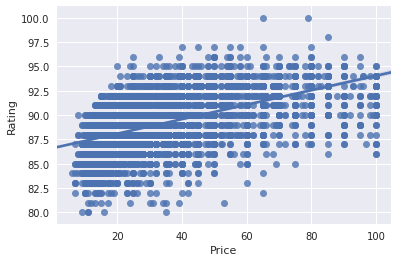

In [128]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline
sns.regplot(x="Price", y="Rating", data=df.sample(frac=0.1))


/home/daniel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


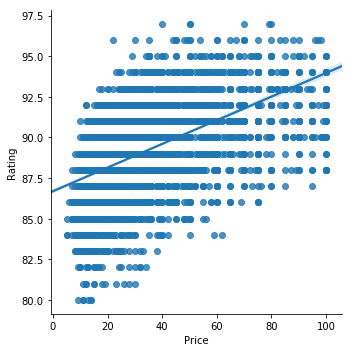

In [109]:
sns.lmplot(x="Price", y="Rating", data=df.sample(frac=0.1))

/home/daniel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


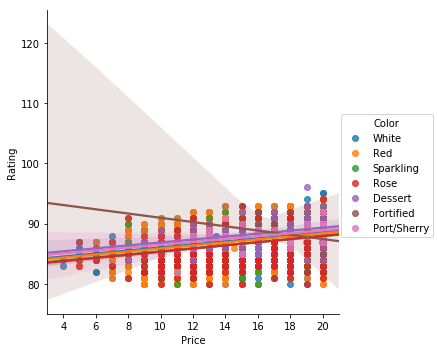

In [52]:
sns.lmplot(x="Price", y="Rating", hue="Color", data=df)

In [296]:
df.Price.value_counts().sort_index()

8.0      201
9.0      322
10.0     965
11.0     512
12.0    1307
13.0    1255
14.0    1125
15.0    2347
16.0    1279
17.0    1234
18.0    1822
19.0    1102
20.0    2939
21.0     481
22.0    1433
23.0     727
24.0    1114
25.0    2733
26.0     702
27.0     562
28.0    1249
29.0     603
30.0    2254
31.0     120
32.0     896
33.0     333
34.0     440
35.0    1685
36.0     621
37.0     203
38.0     808
39.0     407
40.0    1734
41.0      73
42.0     647
43.0     140
44.0     291
45.0    1519
46.0     217
47.0     121
48.0     595
49.0     274
50.0    1622
51.0      37
52.0     240
53.0      65
54.0     173
55.0     907
56.0     134
57.0      59
58.0     225
59.0     109
60.0    1159
61.0      17
62.0     144
63.0      69
64.0      68
65.0     960
66.0      73
67.0      47
Name: Price, dtype: int64

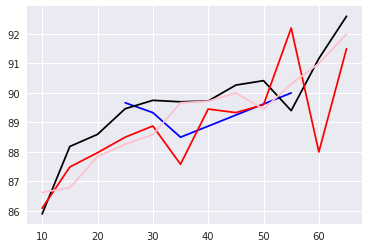

In [297]:
# plot mean by region
plt.plot(df[df.Region == 'Northwestern Italy'][["Bin","Rating"]].groupby('Bin').mean(), color='blue')
plt.plot(df[df.Region == 'Northeastern Italy'][["Bin","Rating"]].groupby('Bin').mean(), color='black')
plt.plot(df[df.Region == 'Central Italy'  ][["Bin","Rating"]].groupby('Bin').mean(), color='red')
plt.plot(df[df.Region == 'Southern Italy' ][["Bin","Rating"]].groupby('Bin').mean(), color='pink')



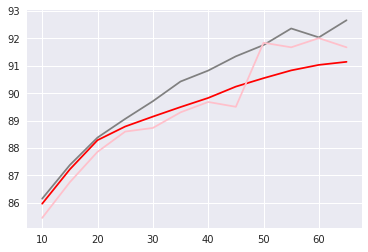

In [298]:
# plot mean by colour
plt.plot(df[df.Color == 'White'][["Bin","Rating"]].groupby('Bin').mean(), color='grey')
plt.plot(df[df.Color == 'Red'  ][["Bin","Rating"]].groupby('Bin').mean(), color='red')
plt.plot(df[df.Color == 'Rose' ][["Bin","Rating"]].groupby('Bin').mean(), color='pink')



In [153]:
# all editors equal?


<module 'matplotlib.colors' from '/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py'>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


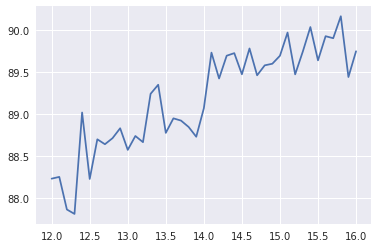

In [295]:
# plot mean by bin
plt.plot(df[df.Alcohol <= 16][df.Alcohol >= 12][["Rating", "Alcohol"]].groupby("Alcohol").mean())
#counts.sort_values('Alchol')

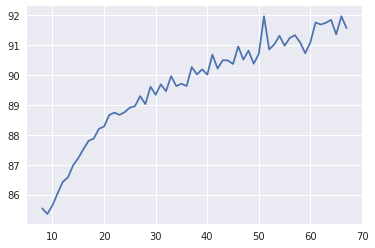

In [299]:
#print(df[df.Price <= 100][["Bin","Rating"]].groupby('Bin').mean())

plt.plot(df[df.Price <= 100][["Price","Rating"]].groupby('Price').mean())

In [303]:
df[["Rating","Color"]].groupby("Color").mean().sort_values('Rating', ascending=False)

,Rating
Color,
Port/Sherry,90.468927
Dessert,90.370474
Fortified,89.360000
Red,89.064060
White,88.876217
Sparkling,88.778714
Rose,87.411135


In [256]:
df.mean()

Rating     89.131584
Price      33.587757
Alcohol    13.561561
Bin        33.651534
dtype: float64